Importing pandas

In [ ]:
import pandas as pd

2

In [ ]:
pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, arviz, altair


In [ ]:
print(pd.__version__)

1.3.5


3

In [ ]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 66e3805b8cabe977f40c05259cc3fcf7ead5687d
python           : 3.7.13.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.144+
Version          : #1 SMP Tue Dec 7 09:58:10 PST 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.3.5
numpy            : 1.21.5
pytz             : 2018.9
dateutil         : 2.8.2
pip              : 21.1.3
setuptools       : 57.4.0
Cython           : 0.29.28
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.6
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1.

In [ ]:
import numpy as np

**DataFrame basics**
A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

4

In [ ]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

5

In [ ]:
df = pd.DataFrame(data , index=labels)
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


In [ ]:
df = pd.DataFrame(data , index=labels)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes
None


6

In [ ]:
print(df.iloc[:3])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no


8

In [ ]:
df = pd.DataFrame(data , index=labels)
print(df.iloc[[0,1,2,3,4,5,6,7,8,9], [0,1]])

  animal  age
a    cat  2.5
b    cat  3.0
c  snake  0.5
d    dog  NaN
e    dog  5.0
f    cat  2.0
g  snake  4.5
h    cat  NaN
i    dog  7.0
j    dog  3.0


9

In [ ]:
print(df.iloc[[3,4,8], [0,1]])

  animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0


10

In [ ]:
df = pd.DataFrame(data , index=labels)
print(df[df['visits'] > 3])

Empty DataFrame
Columns: [animal, age, visits, priority]
Index: []


11

In [ ]:
print(df[df['age'].isnull()])

  animal  age  visits priority
d    dog  NaN       3      yes
h    cat  NaN       1      yes


12

In [ ]:
print(df[df['age'] < 3])

  animal  age  visits priority
a    cat  2.5       1      yes
c  snake  0.5       2       no
f    cat  2.0       3       no


13

In [ ]:
print(df[df['age'].between(2, 4)])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
f    cat  2.0       3       no
j    dog  3.0       1       no


14

In [ ]:
df.loc['f', 'age'] = 1.5
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


15

In [ ]:
df['visits'].sum()

19

16

In [ ]:
print(df['age'].mean())

3.375


17

In [ ]:
df.loc['k'] = ["cat", 2, 1, "no"]
print(df)
df = df.drop('k')
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no
k    cat  2.0       1       no
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


18

In [ ]:
df.groupby('animal').size()

animal
cat      4
dog      4
snake    2
dtype: int64

19

In [ ]:
print(df)
df.sort_values(by=['age', 'visits'], ascending=[False, True])
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


20

In [ ]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})
print(df)

  animal  age  visits  priority
a    cat  2.5       1      True
b    cat  3.0       3      True
c  snake  0.5       2     False
d    dog  NaN       3      True
e    dog  5.0       2     False
f    cat  1.5       3     False
g  snake  4.5       1     False
h    cat  NaN       1      True
i    dog  7.0       2     False
j    dog  3.0       1     False


21

In [ ]:
df['animal'] = df['animal'].replace('snake', 'python')
print(df)

   animal  age  visits  priority
a     cat  2.5       1      True
b     cat  3.0       3      True
c  python  0.5       2     False
d     dog  NaN       3      True
e     dog  5.0       2     False
f     cat  1.5       3     False
g  python  4.5       1     False
h     cat  NaN       1      True
i     dog  7.0       2     False
j     dog  3.0       1     False


21

In [ ]:
df.pivot_table(index='animal', columns='visits', values='age', aggfunc=np.mean)

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


**DataFrames: beyond the basics**

22

In [ ]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

In [ ]:
df.loc[df['A'].shift() != df['A']]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


23

In [ ]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
df

,0,1,2
0,0.849690,0.190937,0.001229
1,0.183558,0.398003,0.183188
2,0.510734,0.345825,0.499796
3,0.124453,0.958440,0.894589
4,0.083778,0.620381,0.897370


In [ ]:
df.sub(df.mean(axis=1), axis=0)

,0,1,2
0,0.502405,-0.156349,-0.346056
1,-0.071359,0.143087,-0.071728
2,0.058615,-0.106293,0.047677
3,-0.534707,0.299279,0.235428
4,-0.450065,0.086538,0.363527


24

In [ ]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,0.322168,0.643624,0.852798,0.680553,0.648989,0.256648,0.526991,0.198313,0.912729,0.501031
1,0.695030,0.138686,0.190133,0.617435,0.519995,0.859460,0.606081,0.083926,0.027187,0.587443
2,0.982594,0.332309,0.361201,0.749032,0.809158,0.092075,0.114984,0.496080,0.913299,0.318412
3,0.401473,0.948950,0.352713,0.303774,0.820043,0.174085,0.059934,0.810128,0.931718,0.063863
4,0.764652,0.068541,0.001381,0.673931,0.996975,0.191983,0.156767,0.508105,0.608919,0.170771


In [ ]:
df.sum().idxmin()

'g'

25

In [ ]:
len(df) - df.duplicated(keep=False).sum()

5

26

In [ ]:
(df.isnull().cumsum(axis=1) == 3).idxmax(axis=1)

0    a
1    a
2    a
3    a
4    a
dtype: object

27

In [ ]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

In [ ]:
df.groupby('grps')['vals'].nlargest(3).sum(level=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


grps
a    409
b    156
c    345
Name: vals, dtype: int64

28

In [ ]:
df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()

KeyError: ignored

**DataFrames: harder problems**

29

In [ ]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

In [ ]:
x = (df['X'] != 0).cumsum()
y = x != x.shift()
df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()

30

In [ ]:
df.unstack().sort_values()[-3:].index.tolist()

[('X', 4), ('X', 6), ('X', 0)]

31

In [ ]:
def replace(group):
    mask = group<0
    group[mask] = group[~mask].mean()
    return group

df.groupby(['grps'])['vals'].transform(replace)

KeyError: ignored

32

In [ ]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})
df

,group,value
0,a,1.0
1,a,2.0
2,b,3.0
3,b,NaN
4,a,2.0
5,b,3.0
6,b,NaN
7,b,1.0
8,a,7.0
9,b,3.0


In [ ]:
g1 = df.groupby(['group'])['value']
g2 = df.fillna(0).groupby(['group'])['value']

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count()

s.reset_index(level=0, drop=True).sort_index()

0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

**Series and DatetimeIndex**

33

In [ ]:
dtime = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dtime)), index=dtime)

34

In [ ]:
s[s.index.weekday == 2].sum()

25.455511437603864

35

In [ ]:
s.resample('m').mean()

2015-01-31    0.521097
2015-02-28    0.581540
2015-03-31    0.555310
2015-04-30    0.571473
2015-05-31    0.420948
2015-06-30    0.368842
2015-07-31    0.400908
2015-08-31    0.377723
2015-09-30    0.576850
2015-10-31    0.574273
2015-11-30    0.431957
2015-12-31    0.471376
Freq: M, dtype: float64

36

In [ ]:
s.groupby(pd.TimeGrouper('4M')).idxmax()

AttributeError: ignored

37

In [ ]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

**Cleaning** **Data**

38

In [ ]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

In [ ]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)

39

In [ ]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']

40

In [ ]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


41

In [ ]:
df = df.drop('From_To', axis=1)
df = df.join(temp)

42

In [ ]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


43

In [ ]:
delays = df['RecentDelays'].apply(pd.Series)

delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]

df = df.drop('RecentDelays', axis=1).join(delays)

**Using** **MultiIndexes**

44

In [ ]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(30), index=mi)

45

In [ ]:
s.index.is_lexsorted()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: MultiIndex.is_lexsorted is deprecated as a public function, users should use MultiIndex.is_monotonic_increasing instead.
  """Entry point for launching an IPython kernel.


True

46

In [ ]:
s.loc[:, [1, 3, 6]]

A  1    0.624957
   3    0.458161
   6    0.809497
B  1    0.769486
   3    0.580087
   6    0.904471
C  1    0.931868
   3    0.579691
   6    0.461284
dtype: float64

47

In [ ]:
s.loc[pd.IndexSlice[:'B', 5:]]

A  5    0.727898
   6    0.809497
   7    0.965691
   8    0.313319
   9    0.285236
B  5    0.233159
   6    0.904471
   7    0.850260
   8    0.738630
   9    0.964519
dtype: float64

48

In [ ]:
s.sum(level=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


A    6.512254
B    7.032097
C    5.173660
dtype: float64

49

In [ ]:
s.unstack().sum(axis=0)

0    2.299219
1    2.326312
2    1.829228
3    1.617938
4    2.344195
5    1.211436
6    2.175252
7    1.895112
8    1.151296
9    1.868023
dtype: float64

50

In [ ]:
new_s = s.swaplevel(0, 1)
new_s

0  A    0.769539
1  A    0.624957
2  A    0.584649
3  A    0.458161
4  A    0.973307
5  A    0.727898
6  A    0.809497
7  A    0.965691
8  A    0.313319
9  A    0.285236
0  B    0.661400
1  B    0.769486
2  B    0.476729
3  B    0.580087
4  B    0.853355
5  B    0.233159
6  B    0.904471
7  B    0.850260
8  B    0.738630
9  B    0.964519
0  C    0.868280
1  C    0.931868
2  C    0.767849
3  C    0.579691
4  C    0.517533
5  C    0.250379
6  C    0.461284
7  C    0.079161
8  C    0.099347
9  C    0.618269
dtype: float64

**Minesweeper**

51

In [ ]:
X = 5
Y = 4

**PLOTTING**

56

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
df

,xs,ys
0,1,4
1,5,2
2,2,1
3,8,9
4,1,6


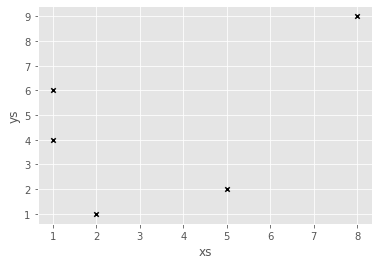

In [ ]:
df.plot.scatter("xs", "ys", color = "black", marker = "x")

57

In [ ]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9], "hours_in" :[1,9,6,5,3,9,2,9,1,7,4,2,2], "happiness" :[2,1,3,2,3,1,2,3,1,2,2,1,3], "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
df

,productivity,hours_in,happiness,caffienated
0,5,1,2,0
1,2,9,1,0
2,3,6,3,1
3,1,5,2,1
4,4,3,3,0
5,5,9,1,0
6,6,2,2,0
7,7,9,3,0
8,8,1,1,1
9,3,7,2,1


In [ ]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52], "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9], "month":range(12) })
df

,revenue,advertising,month
0,57,2.1,0
1,68,1.9,1
2,63,2.7,2
3,71,3.0,3
4,72,3.6,4
5,90,3.2,5
6,80,2.7,6
7,62,2.4,7
8,59,1.8,8
9,51,1.6,9


58

(-1.0, 12.0)

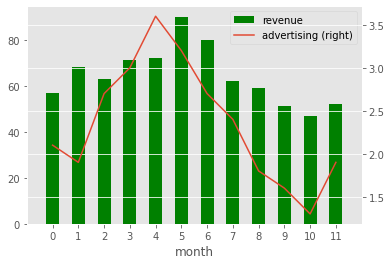

In [ ]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))

In [ ]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

59

In [ ]:
df = day_stock_data()
df.head()

,time,price
0,2022-03-29 09:30:00,100.000000
1,2022-03-29 09:30:05,99.935816
2,2022-03-29 09:30:05,99.974962
3,2022-03-29 09:30:09,99.969140
4,2022-03-29 09:30:11,99.971259


In [ ]:
df.set_index("time", inplace = True)
agg = df.resample("H").ohlc()
agg.columns = agg.columns.droplevel()
agg["color"] = (agg.close > agg.open).map({True:"green",False:"red"})
agg.head()

,open,high,low,close,color
time,,,,,
2022-03-29 09:00:00,100.000000,101.324860,98.934389,101.291643,green
2022-03-29 10:00:00,101.376732,103.632835,100.890671,102.041435,green
2022-03-29 11:00:00,101.995735,102.024034,99.434139,99.704817,red
2022-03-29 12:00:00,99.738447,100.689754,96.747950,97.081384,red
2022-03-29 13:00:00,97.148794,98.303977,96.241508,97.047552,red


60

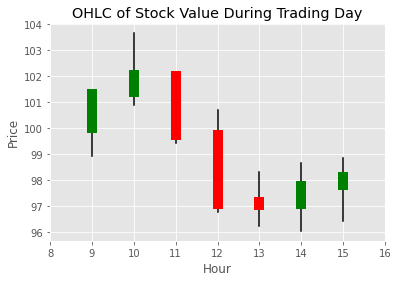

In [ ]:
plot_candlestick(agg)